<b><h3>Hotelling's T-square Anomaly Detection</h3></b>

In [14]:
Hotellings_T2 = function(train, test, alpha=0.05){
  obs = dim(train)[1]
  dim = dim(train)[2]
  
  # qf: F-distribution
  CL = qf(1-alpha, dim, obs-dim) * (dim*(obs+1)*(obs-1)/(obs*(obs-dim)))

  mu = apply(train, 2, mean)
  mu_mat = matrix(mu, nrow(test), ncol(test), byrow=T)
  w = cov(train)
  gap = test - mu_mat

  T2_mat = matrix(0, nrow(test), 1)
  for(i in 1:nrow(test)){
    T2 = sqrt(as.matrix(gap[i,]) %*% solve(w) %*% t(as.matrix(gap[i,])))
    T2_mat[i,] = T2
  }
    ret = list(
        T2_mat = T2_mat, 
        CL=CL
  )
  return(ret)
}

In [15]:
df = iris[-5]

In [16]:
train = df[1:50,]
test = df

In [17]:
model = Hotellings_T2(train, test, alpha=0.05)

In [18]:
T2_mat = model$T2_mat
CL = model$CL

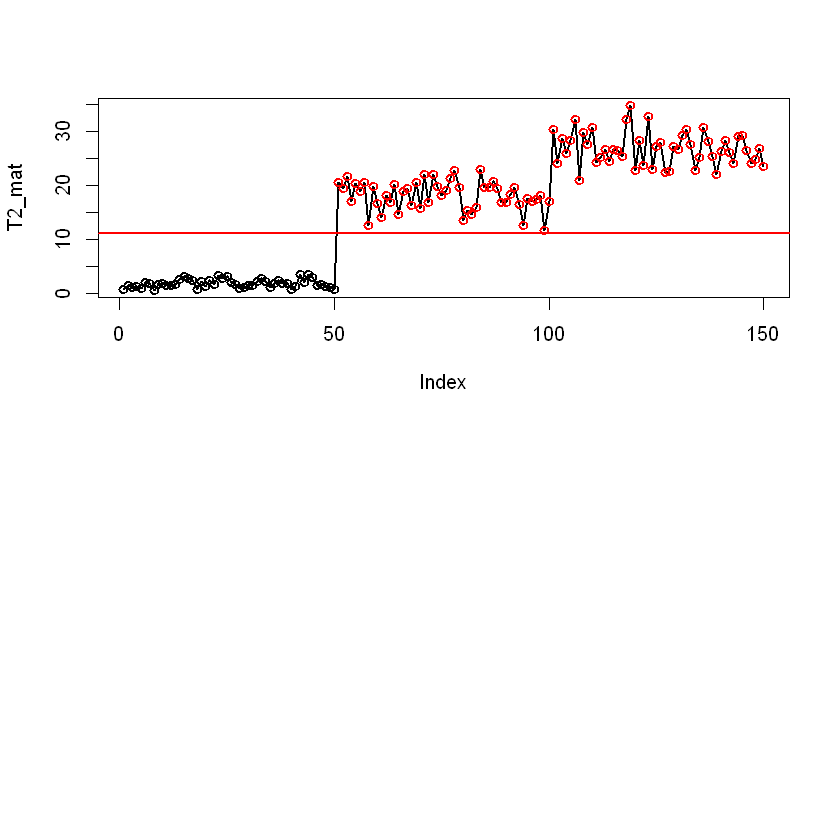

In [19]:
outlier = T2_mat>CL
par(mfrow=c(2,1))
plot(T2_mat, type='o', lwd=2, col=outlier+1)
abline(h = CL, col='red', lwd=2)